In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
np.random.seed(40)

### Load & check the data:

In [3]:
# Loading the MNIST dataset from sklearn
from sklearn.datasets import fetch_openml
mnist_jay = fetch_openml('mnist_784', version=1, as_frame=True)
mnist_jay.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
#Assign the data and target to a ndarray
X_jay, y_jay = mnist_jay['data'], mnist_jay['target']
X_jay.shape, y_jay.shape

((70000, 784), (70000,))

In [5]:
# print the type of X_jay
print(type(X_jay))
print(type(y_jay))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


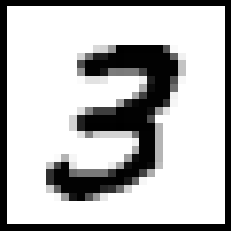

In [6]:
some_digit = X_jay.to_numpy()[7]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [7]:
y_jay[7]

'3'

In [8]:
y_jay = y_jay.astype(np.uint8)

In [9]:
some_digit = X_jay.to_numpy()[7]
some_digit_image = some_digit.reshape(28, 28)

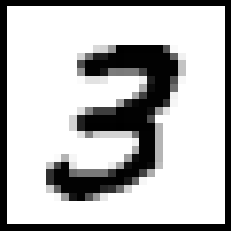

In [10]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
some_digit1 = X_jay.to_numpy()[7]
some_digit2 = X_jay.to_numpy()[5]
some_digit3 = X_jay.to_numpy()[0]

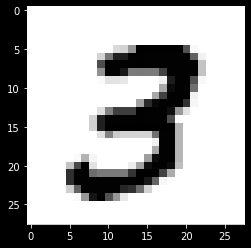

None

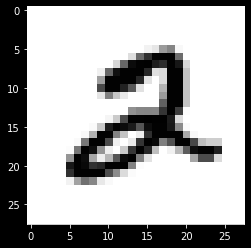

None

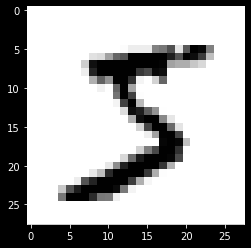

None

In [12]:
# Use imshow method to plot the values of the three variables you defined in the above point.   
plt.imshow(some_digit1.reshape(28, 28), cmap=mpl.cm.binary, interpolation='nearest')
display(plt.show())
plt.imshow(some_digit2.reshape(28, 28), cmap=mpl.cm.binary, interpolation='nearest')
display(plt.show())
plt.imshow(some_digit3.reshape(28, 28), cmap=mpl.cm.binary, interpolation='nearest')
display(plt.show())


### Pre-process the data

In [13]:
#	The current target values range from 0 to 9 i.e. 10 classes. Transform the target variable to 3 classes as follows:
# a.	Any digit between 0 and 3 inclusive should be assigned a target value of 0
# b.	Any digit between 4 and 6 inclusive should be assigned a target value of 1
# c.	Any digit between 7 and 9 inclusive should be assigned a target value of 9
# d.	Use the following code to do this:
y_jay_new = np.where(y_jay < 4, 0, y_jay)
y_jay_new = np.where((y_jay_new > 3) & (y_jay_new < 7) , 1, y_jay_new)
y_jay_new = np.where((y_jay_new > 6) & (y_jay_new < 10), 9, y_jay_new)
print(y_jay_new)


[1 0 1 ... 1 1 1]


In [14]:
# Print the frequencies of each of the three target classes in y_jay_new
unique, counts = np.unique(y_jay_new, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 28911]
 [    1 20013]
 [    9 21076]]


In [15]:
# Split your data into train test. Assign the first 60,000 records for training and the last 10,000 records for testing. 
X_train, X_test = X_jay[:60000], X_jay[60000:]
y_train, y_test = y_jay_new[:60000], y_jay_new[60000:]

### Build Classification Models

In [16]:
# Train a Naive Bayes classifier using the training data. Name the classifier NB_clf_firstname.
from sklearn.naive_bayes import GaussianNB
NB_clf_jay = GaussianNB()
NB_clf_jay.fit(X_train, y_train)

# Predict the class labels for the test data using the trained classifier. Assign the result to y_pred_firstname.
y_pred_jay = NB_clf_jay.predict(X_test)
print(y_pred_jay)


[9 0 9 ... 9 1 1]


In [20]:
#Use 3-fold cross validation against the train data and note the results in your written response.
from sklearn.model_selection import cross_val_score
cross_val_score(NB_clf_jay, X_train, y_train, cv=3)

#Use the model to score the accuracy against the test data
print(NB_clf_jay.score(X_test, y_test) * 100)


58.589999999999996


In [22]:
# Use the classifier to predict the three variables you defined in point 7 above.
print(NB_clf_jay.predict([some_digit1]))
print(NB_clf_jay.predict([some_digit2]))
print(NB_clf_jay.predict([some_digit3]))

[9]
[0]
[9]


C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Logistic regression

In [27]:
#Train a Logistic regression classifier using the same training data. Name the classifier LR_clf_firstname.
from sklearn.linear_model import LogisticRegression
LR_clf_jay = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR_clf_jay.fit(X_train, y_train)


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [28]:
# Use the classifier to predict the three variables you defined in point 7 above.
print(LR_clf_jay.predict([some_digit1]))
print(LR_clf_jay.predict([some_digit2]))
print(LR_clf_jay.predict([some_digit3]))

[0]
[0]
[0]


C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
#Use 3-fold cross validation against the train data and note the results in your written response.
from sklearn.model_selection import cross_val_score
cross_val_score(LR_clf_jay, X_train, y_train, cv=3)

#Use the model to score the accuracy against the test data
print(LR_clf_jay.score(X_test, y_test) * 100)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

89.47


In [35]:
# Generate the precision and recall of the mode
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, y_pred_jay, average='weighted') * 100)
print(recall_score(y_test, y_pred_jay, average='weighted') * 100)





71.98421924239521
58.589999999999996
